[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/darkmetrics/banks/blob/main/code/demonstration.ipynb)

## Прогнозирование вероятности дефолта для российских банков.

**Авторы**:
* **Волкова Анастасия**
* **Дубленский Иван**
* **Лозовой Владимир**
* **Тельман Куан**

### 1. Загрузка данных и первое знакомство с ними.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# включение множественного вывода для Google Colab
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Слава богу, `pandas` умеет читать данные с интернет-страниц. Важно, что на Гитхабе на страничке файла с данными надо нажать кнопку `raw`, и тогда `url`-ссылка на файл с данными изменится, в тексте ссылки появится слово `raw`. Именно такую ссылку и надо использовать для чтения данных.

In [58]:
url = "https://raw.githubusercontent.com/darkmetrics/banks/main/data/metrics.csv"
url2 = "https://raw.githubusercontent.com/darkmetrics/banks/main/data/defaults.csv"
data = pd.read_csv(url, parse_dates=True, index_col='date')
defaults = pd.read_csv(url2, parse_dates=True, index_col='date')

print('Head of table with bank metrics:\n')
data.head(5)
print('\nHead of table with bank defaults:\n')
defaults.head(5)

Head of table with bank metrics:



,REGN,Year,Month,NetIncome,NetSecurityIncome,NetDerivativeIncome,NetFeeIncome,NetInvestmentIncome,NetInterestIncome,Assets,...,InterbankShareInLiabs,CreditsRetail_Me,ownership_state,form_public,region_notmoscow,Moodys,ExpertRA,DefaultIn365Days,DefaultIn730Days,DefaultIn10000Days
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1,2015,1,0.007337,-0.080195,1.821275,1.003520,1.127056e-07,3.267442,1.209364e+09,...,0.105845,147875391.0,0,0,0,no,no,0,0,0
2015-02-01,1,2015,2,0.006679,-0.080195,1.821275,1.003520,1.127056e-07,3.267442,1.328361e+09,...,0.112639,145009568.0,0,0,0,no,no,0,0,0
2015-03-01,1,2015,3,0.007374,-0.080195,1.821275,1.003520,1.127056e-07,3.267442,1.203223e+09,...,0.119042,139987699.0,0,0,0,no,no,0,0,0
2015-04-01,1,2015,4,0.002215,-0.075207,1.304973,0.607162,-0.000000e+00,1.858185,1.167734e+09,...,0.096728,135048179.0,0,0,0,no,no,0,0,0
2015-05-01,1,2015,5,0.002413,-0.075207,1.304973,0.607162,-0.000000e+00,1.858185,1.072174e+09,...,0.122466,130841858.0,0,0,0,no,no,0,0,0



Head of table with bank defaults:



,name,REGN,type,region
date,,,,
2021-09-17,Платина,2347,отозв.,Москва
2021-08-06,КС Банк,1752,отозв.,Саранск (Республика Мордовия)
2021-07-23,Руна-Банк,3207,отозв.,Москва
2021-07-23,Русское Финансовое Общество,3427,отозв.,Москва
2021-06-25,Актив Банк,2529,отозв.,Саранск (Республика Мордовия)


Сначала выберем нужные столбцы из метрик.

In [59]:
cols = ['REGN','Assets','personal_page','app','CapitalAdequacy_norm','LiquidityMonth_norm',
        'LiquidityDay_norm','LiquidityLong_norm','CreditsToInsidersCoefficient_norm',
        'ROE','ROA','ReservesChange', 'EquityToImmobilizedAssets', 
        'CreditsReturnCorporates','DepositsInterestCorporates','CreditsReturnRetail','DepositsInterestRetail',
        'CostOfRisk', 'InterbankShareInLiabs','ownership_state','form_public','region_notmoscow',
        'Moodys','ExpertRA',
        # эти столбцы для расчета дополнительных метрик - сами по себе они не нужны
        'Credits_Me','Deposits_Me', 'CreditsCorporates_Me', 'CreditsRetail_Me',
        'IncomeRetail_Me','IncomeCorporates_Me','ExpenditureRetail_Me','ExpenditureCorporates_Me',
        'ExpendituresReserves_Me', 'DepositsRetail_Me','DepositsCorporates_Me']
len(cols)

36

In [60]:
data = data[cols]

Посмотрим на содержимое таблички: типы данных, количество пропусков.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40885 entries, 2015-01-01 to 2016-12-01
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   REGN                               40885 non-null  int64  
 1   Assets                             40885 non-null  float64
 2   personal_page                      40885 non-null  float64
 3   app                                40885 non-null  float64
 4   CapitalAdequacy_norm               40885 non-null  float64
 5   LiquidityMonth_norm                40885 non-null  float64
 6   LiquidityDay_norm                  40885 non-null  float64
 7   LiquidityLong_norm                 40885 non-null  float64
 8   CreditsToInsidersCoefficient_norm  40885 non-null  float64
 9   ROE                                40885 non-null  float64
 10  ROA                                40885 non-null  float64
 11  ReservesChange                     40

И заменим некоторые названия столбцов в данных - с исходными названиями трудновато будет работать.

In [62]:
new_names = {'CapitalAdequacy_norm':'n_1_0',
             'LiquidityMonth_norm':'n3',
             'LiquidityDay_norm':'n2',
             'LiquidityLong_norm':'n4',
             'CreditsToInsidersCoefficient_norm':'n_10_1',
             'ReservesChange':'reserv_chng',
             'EquityToImmobilizedAssets':'equity_immobil',
             'CreditsReturnCorporates':'corp_loan',
             'DepositsInterestCorporates':'corp_depo',
             'CreditsReturnRetail':'retail_loan',
             'DepositsInterestRetail':'retail_depo',
             'CostOfRisk':'cor',
             'InterbankShareInLiabs':'mbk_share', 
             'ownership_state':'owner', 
             'form_public':'public',
             'region_notmoscow':'notmoscow',
             'CreditsCorporates_Me':'corp_loan_abs',
             'CreditsRetail_Me':'retail_loans_abs',
             'DepositsRetail_Me':'retail_depo_abs',
             'DepositsCorporates_Me':'corp_depo_abs',
             'IncomeRetail_Me':'retail_inc',
             'IncomeCorporates_Me':'corp_inc',
             'ExpenditureRetail_Me':'retail_cost',
             'ExpenditureCorporates_Me':'corp_cost',
             'ExpendituresReserves_Me':'reserv_cost'}

data.rename(columns=new_names, inplace=True)
data.columns = [x.lower().replace('_me', '') for x in data.columns]

In [63]:
defaults.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2205 entries, 2021-09-17 to 2015-12-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2205 non-null   object
 1   REGN    2205 non-null   int64 
 2   type    2205 non-null   object
 3   region  2205 non-null   object
dtypes: int64(1), object(3)
memory usage: 86.1+ KB


Теперь посмотрим, совпадают ли даты для наборов данных с дефолтами и с метриками.

In [64]:
print(f"Самая ранняя дата в метриках: {data.index.min()}")
print(f"Самая ранняя дата в дефолтах: {defaults.index.min()}")

Самая ранняя дата в метриках: 2015-01-01 00:00:00
Самая ранняя дата в дефолтах: 1991-01-22 00:00:00


Так не годится, отберем данные о дефолтах с 2015 года.

In [65]:
defaults = defaults[defaults.index.year>=2015]
defaults.head(3)

,name,REGN,type,region
date,,,,
2021-09-17,Платина,2347,отозв.,Москва
2021-08-06,КС Банк,1752,отозв.,Саранск (Республика Мордовия)
2021-07-23,Руна-Банк,3207,отозв.,Москва


### 2. Предобработка данных и создание новых признаков.

#### 2.1 Числовые признаки.

Для начала нам надо заполнить пропуски в данных. Посмотрим, в каких столбцах есть пропуски и сколько их:

Доля пропусков от общего числа наблюдений


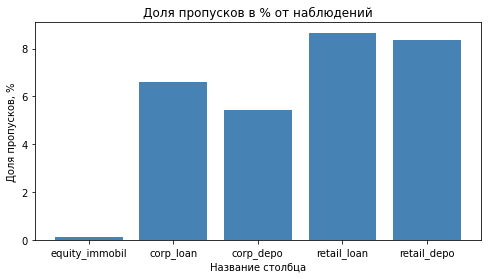

In [66]:
print('Доля пропусков от общего числа наблюдений')
nans = data.isna().sum()[data.isna().sum()!=0]/len(data)
plt.figure(figsize=(8, 4))
plt.bar(nans.index, nans.values*100,  color='steelblue');
plt.xlabel('Название столбца');
plt.ylabel('Доля пропусков, %');
plt.title('Доля пропусков в % от наблюдений');

Теперь нам надо выбрать стратегию, как заполнять пропуски. Заметно, что больше всего пропусков для столбцов со ставками - эти пропуски мы точно будем заполнять, наблюдения с пропусками в других столбцах выкинем. 

Наверно, оптимальный вариант - это заполнить пропущенные ставки значениями, средними по банковской системе на дату пропуска. Поэтому сначала рассчитаем средние ставки по банковской системе. Также сразу посчитаем совокупные активы банковской системы - этот показатель нам тоже пригодится.

In [67]:
avg_cols = ['assets','corp_loan_abs', 'retail_loans_abs',
            'retail_inc','corp_inc','retail_cost', 
            'corp_cost', 'retail_depo_abs','corp_depo_abs']

group_dict = dict(zip(avg_cols, ['sum']*len(avg_cols)))
avg = data.groupby(data.index).agg(group_dict).reset_index()
avg.index = avg['date']
# посчитаем собственно средние ставки
avg['avg_corp_loan'] = avg['corp_inc']/avg['corp_loan_abs']
avg['avg_retail_loan'] = avg['retail_inc']/avg['retail_loans_abs']
avg['avg_corp_depo'] = avg['corp_cost']/avg['corp_depo_abs']
avg['avg_retail_depo'] = avg['retail_cost']/avg['retail_depo_abs']

Нарисуем средние ставки по кредитам и депозитам, это само по себе любопытно и информативно.

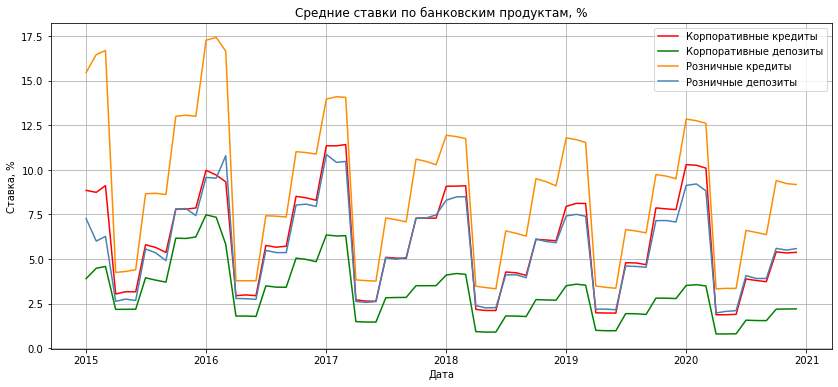

In [68]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(avg.avg_corp_loan*100, color='red', label='Корпоративные кредиты')
ax.plot(avg.avg_corp_depo*100, color='green', label='Корпоративные депозиты')
ax.plot(avg.avg_retail_loan*100, color='darkorange', label='Розничные кредиты')
ax.plot(avg.avg_retail_depo*100, color='steelblue', label='Розничные депозиты')
ax.set_xlabel('Дата')
ax.set_ylabel('Ставка, %')
ax.set_title('Средние ставки по банковским продуктам, %')
ax.legend()
ax.grid(True)
fig.show();

Странновато, конечно, ну да ладно. Теперь приклеим сгруппированный набор данных к основному, чтобы посчитать отклонения от средних ставок по разным продуктам для каждого банка.

In [72]:
avg.rename(columns={'assets':'total_assets'}, inplace=True)

data = pd.merge(left=data, 
                right=avg[['total_assets', 'avg_corp_loan', 'avg_retail_loan', 
                           'avg_corp_depo','avg_retail_depo']],
                how='left',
                left_index=True, right_index=True)

,regn,assets,personal_page,app,n_1_0,n3,n2,n4,n_10_1,roe,...,retail_cost,corp_cost,reserv_cost,retail_depo_abs,corp_depo_abs,total_assets,avg_corp_loan,avg_retail_loan,avg_corp_depo,avg_retail_depo
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1,1.209364e+09,1.0,1.0,12.675,1.250657e-07,8.057125e-08,78.985,0.180,-0.068259,...,-1979864.0,-17376616.0,-32171550.0,-4.416043e+08,-103183444.0,8.925370e+10,0.088485,0.154507,0.039069,0.072715
2015-01-01,1000,8.119045e+09,1.0,1.0,13.620,1.123654e-08,5.142231e-09,57.880,0.015,-0.021110,...,-957887.0,-128826630.0,-147445136.0,-2.219172e+09,-20919606.0,8.925370e+10,0.088485,0.154507,0.039069,0.072715
2015-01-01,1002,1.584751e+06,0.0,0.0,19.870,5.894301e-05,5.097331e-05,6.170,1.250,-0.057453,...,-60566.0,-8295.0,-67241.0,-9.648800e+04,-593647.0,8.925370e+10,0.088485,0.154507,0.039069,0.072715


Посчитаем 
1. Разницу между ставками конкретного банка и средними по системе ставками для
  * Корпоративных кредитов
  * Корпоративных депозитов
  * Розничных кредитов
  * Розничных депозитов
2. Отношение кредитов к депозитам (Loan-Deposit Ratio)
3. Доли кредитов в пассивах:
  * Долю всего кредитного портфеля в пассивах
  * Долю корпоративных кредитов в пассивах
  * Долю розничных кредитов в пассивах
4. Отношение активов банка к активам всей банковской системы на соответствующую дату
5. Дисперсию
  * Активов банка
  * Кредитного портфеля банка
  * Корпоративного кредитного портфеля банка

In [74]:
data.columns

Index(['regn', 'assets', 'personal_page', 'app', 'n_1_0', 'n3', 'n2', 'n4',
       'n_10_1', 'roe', 'roa', 'reserv_chng', 'equity_immobil', 'corp_loan',
       'corp_depo', 'retail_loan', 'retail_depo', 'cor', 'mbk_share', 'owner',
       'public', 'notmoscow', 'moodys', 'expertra', 'credits_me',
       'deposits_me', 'liabilities', 'corp_loan_abs', 'retail_loans_abs',
       'retail_inc', 'corp_inc', 'retail_cost', 'corp_cost', 'reserv_cost',
       'retail_depo_abs', 'corp_depo_abs', 'total_assets', 'avg_corp_loan',
       'avg_retail_loan', 'avg_corp_depo', 'avg_retail_depo'],
      dtype='object')

In [ ]:
# 1 дифференциалы процентных ставок
data['corp_loan_spread'] = data['avg_corp_loan']-data['corp_loan']
data['retail_loan_spread'] = data['avg_retail_loan']-data['retail_loan']
data['corp_depo_spread'] = data['avg_corp_depo']-data['corp_depo']
data['corp_loan_spread'] = data['avg_retail_loan']-data['retail_depo']
# 2 loan-deposit ratio
data['ldr'] = data['credits']/data['deposits']
# 3 доли кредитов в пассивах
data['loan_share'] = data['credits']/data['assets']
pass
pass
# 4 доля активов банка в активах всей банковской системы
data['size'] = data['assets']/data['total_assets']

#### 2.2 Категориальные признаки.

Посмотрим, что из себя представляют два строковых признака, которые у нас есть:

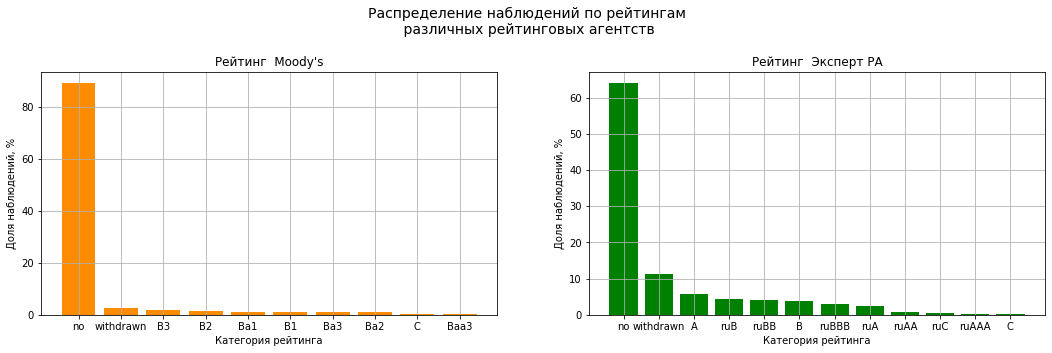

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
fig.subplots_adjust(top=0.8)

ax[0].bar(data.moodys.value_counts().index, 
          (data.moodys.value_counts()/len(data)*100).values, color='darkorange')
ax[0].set_title("Рейтинг  Moody's")
ax[0].set_xlabel('Категория рейтинга')
ax[0].set_ylabel('Доля наблюдений, %')
ax[0].grid(True)

ax[1].bar(data.expertra.value_counts().index, 
          (data.expertra.value_counts()/len(data)*100).values, color='green')
ax[1].set_title("Рейтинг  Эксперт РА")
ax[1].set_xlabel('Категория рейтинга')
ax[1].set_ylabel('Доля наблюдений, %')
ax[1].grid(True)

fig.suptitle('Распределение наблюдений по рейтингам\n различных рейтинговых агентств', 
             y=0.98, fontsize=14)
fig.show();

Посмотрим на распределения всех числовых признаков: